In [70]:
import numpy as np
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
df = pd.read_csv('toy_jieba.csv')

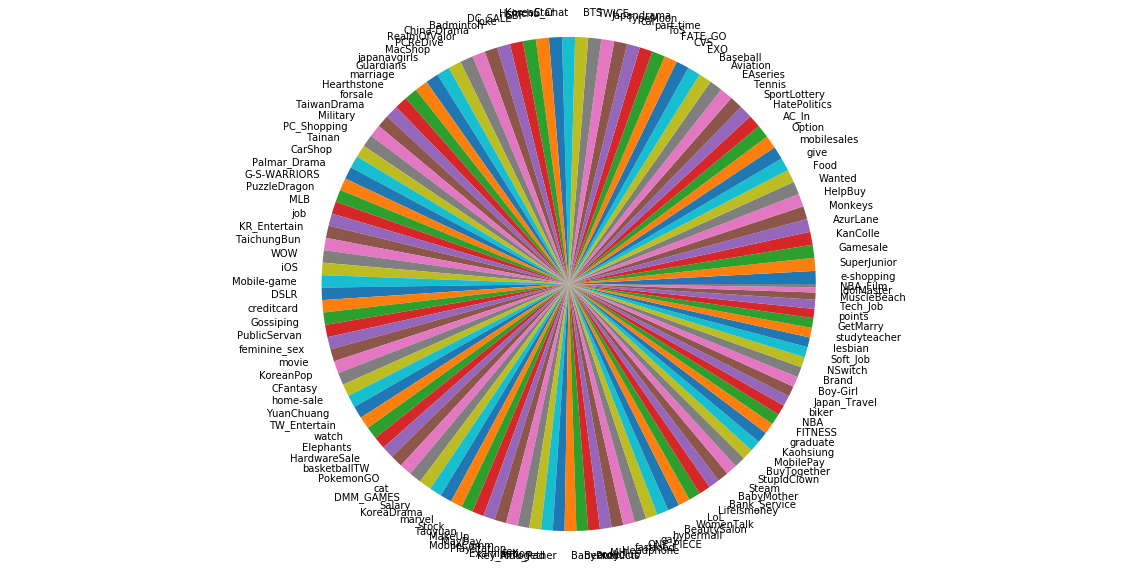

In [63]:
plt.figure(figsize=(20, 10))
plt.pie(df['category'].value_counts() , labels = df['category'].value_counts().index)
plt.axis('equal')
plt.show()

In [77]:
y = df.category
X = df.words

all_unique_classes =[]
for i in y:
    if i not in all_unique_classes:
        all_unique_classes.append(i)

In [65]:
le=LabelEncoder()
le.fit(df['category'].drop_duplicates(keep='first'))

y_encoder=le.transform(y)

vectorizer = CountVectorizer()
X_encoder = vectorizer.fit_transform(X)

In [66]:
print(X[0])
print(X_encoder[0])
print(vectorizer.inverse_transform(X_encoder[0]))
print(y_encoder)

['臉書賴', '清德', '我', '不會傷', '害民進', '黨', '作者', '阿沙布', '魯', '看板', '標題', '臉書賴', '清德', '我', '不會傷', '害民', '進黨', '時間', '引述', '大體', '老屍', '之銘言', '本周', '三民', '進黨', '中', '執會將', '再', '討論', '總統', '初選', '事宜', '我', '在', '這裡', '呼籲黨', '內', '同志', '尊重', '並維護民', '進黨', '的', '民主', '機制', '初選', '時間', '已', '一延', '再延', '如果', '又', '修改', '已經', '公告', '的', '選舉', '辦法', '對民進', '黨將', '造成', '莫大', '的', '傷害', '我', '是', '民進', '黨', '黨員', '二十五年', '來', '在', '所有', '的', '公職', '職位', '上', '努力', '表現', '因為', '我', '的', '肩膀', '上', '背', '負著民', '進黨', '的', '形象', '與', '責任', '如果', '民進', '黨', '中', '執會', '本周', '三', '真的', '再', '做出', '傷害', '黨', '的', '決定', '我', '也', '不會', '做出', '傷害', '黨', '的', '事', '因為', '我', '深愛這個', '黨', '因此', '沒', '有所', '謂', '我將', '採取', '法律', '戰', '的', '說', '法', '我', '再次', '強調民', '進黨', '的', '核心', '價值', '在', '這次', '初選中', '已', '受到', '傷害', '我', '不會', '再', '進', '一步', '傷害', '這個', '黨賴', '清德', '還好民', '進黨', '有賴', '清德', '在', '蔡', '英文', '執政下', '的', '民進', '黨', '已經', '失去', '黨魂', '和', '民主', '精神', '價值', '了', '在', '這次', '的', '總統', '初選', '

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_encoder.toarray() , y_encoder, test_size=0.3, random_state=42)

In [68]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)

In [79]:
def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(200, 100))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [80]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))
plot_confusion_matrix(confusion_matrix(y_predict, y_test), all_unique_classes)

Accuracy: 0.4364406779661017
Confusion matrix, without normalization
